## Monte Carlo Simulation

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Adjustment of Settings

In [14]:
pd.set_option("precision", 2)
pd.set_option('display.max_colwidth', 1000)

### Parameters and Arguments

In [2]:
repeat = 100
#1 stand cost variations
stand_cost_values = [6_000, 8_000, 10_000, 12_000, 14_000, 16_000, 18_000]
stand_cost_weights = [0.05, 0.10, 0.30, 0.25, 0.15, 0.10, 0.05]

#2 working capital variations
working_capital_values = [1, 2, 3, 4, 5, 6, 7]
working_capital_weights = [0.05, 0.10, 0.20, 0.30, 0.20, 0.10, 0.05]

#3 lease deposit variations
lease_deposit_values = [1, 2, 3, 4, 5, 6]
lease_deposit_weights = [0.05, 0.10, 0.30, 0.25, 0.20, 0.10]

#4 other investment variations
other_investment_values = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
other_investment_weights = [0.15, 0.30, 0.25, 0.15, 0.10, 0.05]

#5 performance multiplier variations
performance_multiplier_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012,
                                0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02]
performance_multiplier_weights = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.10, 0.06, 
                                  0.04, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01]

#6 project life
project_life_values = [12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84]
project_life_weights = [0.02, 0.04, 0.06, 0.08, 0.10, 0.20, 0.25, 0.10, 0.05, 0.04, 0.03, 0.02, 0.01]

#7 lease amount variations
lease_amount_values =  [3_000, 4_000, 5_000, 6_000, 7_000, 8_000]
lease_amount_weights = [0.10, 0.20, 0.35, 0.20, 0.10, 0.05]

#8 other expenses variations
other_expenses_values = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
other_expenses_weights = [0.15, 0.30, 0.25, 0.15, 0.10, 0.05]

#9 3d price variations
d3_price_values = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
d3_price_weights = [0.03, 0.05, 0.07, 0.09, 0.11, 0.15, 0.40, 0.06, 0.03, 0.01]

#10 other price variations
other_price_values = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36]
other_price_weights = [0.03, 0.05, 0.07, 0.09, 0.11, 0.15, 0.40, 0.06, 0.03, 0.01]

#11 purchasing cost variations
purchasing_price_values = [4, 5, 6, 7, 8, 9, 10]
purchasing_price_weights = [0.01, 0.36, 0.36, 0.20, 0.04, 0.02, 0.01]

### Values

In [3]:
stand_cost = random.choices(stand_cost_values, weights=stand_cost_weights, k=repeat)
working_capital = random.choices(working_capital_values, weights=working_capital_weights, k=repeat)
lease_deposit = random.choices(lease_deposit_values, weights=lease_deposit_weights, k=repeat)
other_investment = random.choices(other_investment_values, weights=other_investment_weights, k=repeat)
performance_multiplier = random.choices(performance_multiplier_values, weights=performance_multiplier_weights, k=repeat)
project_life = random.choices(project_life_values, weights=project_life_weights, k=repeat)
lease_amount = random.choices(lease_amount_values, weights=lease_amount_weights, k=repeat)
other_expenses = random.choices(other_expenses_values, weights=other_expenses_weights, k=repeat)
d3_price = random.choices(d3_price_values, weights=d3_price_weights, k=repeat)
other_price = random.choices(other_price_values, weights=other_price_weights, k=repeat)
purchasing_price = random.choices(purchasing_price_values, weights=purchasing_price_weights, k=repeat)

### Dataframe

In [4]:
project = {'stand cost': stand_cost, 'working capital': working_capital, 'lease deposit': lease_deposit,
           'other investment': other_investment, 'performance multiplier': performance_multiplier, 
          'project life': project_life, 'lease amount': lease_amount, 'other expenses': other_expenses,
           'd3 price': d3_price, 'other price': other_price, 'purchasing price': purchasing_price}

df = pd.DataFrame(project)

df.head(10)

,stand cost,working capital,lease deposit,other investment,performance multiplier,project life,lease amount,other expenses,d3 price,other price,purchasing price
0,12000,4,2,0.05,0.007,66,6000,0.05,14,30,7
1,14000,6,5,0.05,0.005,48,3000,0.20,17,30,5
2,10000,6,3,0.25,0.011,42,5000,0.05,18,36,5
3,18000,5,5,0.20,0.010,48,7000,0.20,16,24,5
4,8000,3,5,0.15,0.005,48,5000,0.10,15,24,5
5,10000,5,4,0.10,0.010,48,4000,0.10,11,30,7
6,12000,7,2,0.10,0.008,48,3000,0.15,15,36,6
7,8000,6,4,0.10,0.012,24,5000,0.15,19,28,5
8,14000,4,4,0.20,0.005,84,5000,0.25,17,30,5
9,16000,7,4,0.20,0.007,36,4000,0.25,17,24,5


### Histogram for Dataframe

Text(0.5, 0, 'US$')

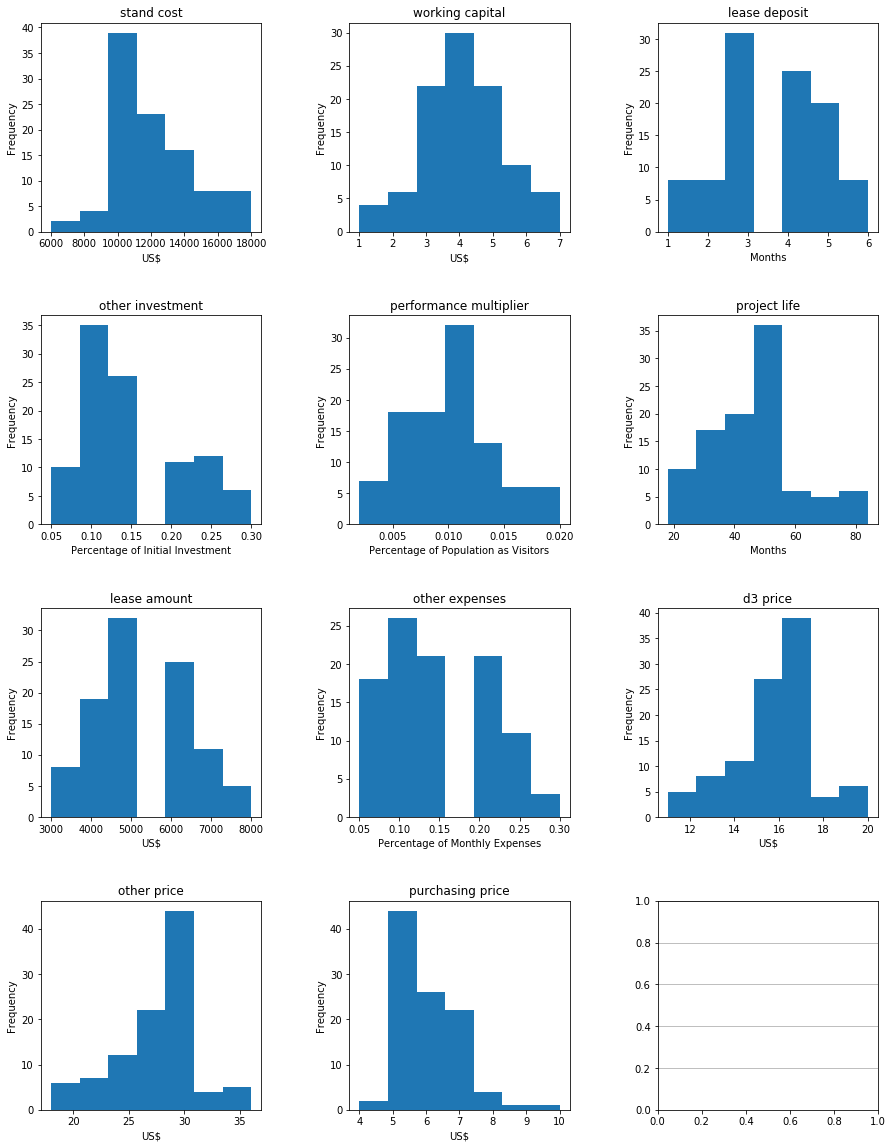

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=3, squeeze=False, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.grid(which='major', axis='y')

df['stand cost'].plot(ax=axes[0, 0], title='stand cost', kind = "hist", bins = 7)
df['working capital'].plot(ax=axes[0, 1], title='working capital', kind = "hist", bins = 7)
df['lease deposit'].plot(ax=axes[0, 2], title='lease deposit', kind = "hist", bins = 7)
df['other investment'].plot(ax=axes[1, 0], title='other investment', kind = "hist", bins = 7)
df['performance multiplier'].plot(ax=axes[1, 1], title='performance multiplier', kind = "hist", bins = 7)
df['project life'].plot(ax=axes[1, 2], title='project life', kind = "hist", bins = 7)
df['lease amount'].plot(ax=axes[2, 0], title='lease amount', kind = "hist", bins = 7)
df['other expenses'].plot(ax=axes[2, 1], title='other expenses', kind = "hist", bins = 7)
df['d3 price'].plot(ax=axes[2, 2], title='d3 price', kind = "hist", bins = 7)
df['other price'].plot(ax=axes[3, 0], title='other price', kind = "hist", bins = 7)
df['purchasing price'].plot(ax=axes[3, 1], title='purchasing price', kind = "hist", bins = 7)

axes[0, 0].xaxis.set_label_text("US$")
axes[0, 1].xaxis.set_label_text("US$")
axes[0, 2].xaxis.set_label_text("Months")
axes[1, 0].xaxis.set_label_text("Percentage of Initial Investment")
axes[1, 1].xaxis.set_label_text("Percentage of Population as Visitors")
axes[1, 2].xaxis.set_label_text("Months")
axes[2, 0].xaxis.set_label_text("US$")
axes[2, 1].xaxis.set_label_text("Percentage of Monthly Expenses")
axes[2, 2].xaxis.set_label_text("US$")
axes[3, 0].xaxis.set_label_text("US$")
axes[3, 1].xaxis.set_label_text("US$")

### Other Data

In [7]:
# Additional arguments
city_population = 5_000_000
return_rate = 0.05

# 0.50 is the share of each product in the sales.
d3_sales = city_population * df['performance multiplier'] * 0.50 * df['d3 price']
other_sales = city_population * df['performance multiplier'] * 0.50 * df['other price']
marginal_tax_rate = 0.20

### Styling

In [8]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

### Updated Dataframe

In [9]:
df['monthly expenses'] = (5_650 + df['lease amount']) * (1 + df['other expenses'])
df['initial investment'] = (55_000 + df['stand cost'] + df['lease deposit'] * df['lease amount'] + df['monthly expenses'] * df['working capital']) * (1 + df['other investment'])
df['monthly sales'] = (d3_sales + other_sales) * (1 - return_rate) / df['project life']   
df['monthly COGS'] = city_population * df['performance multiplier'] * df['purchasing price'] / df['project life']
df['Net Profit'] = (df['monthly sales'] - df['monthly COGS'] - df['monthly expenses']) * (1 -marginal_tax_rate)
df['ROI'] = df['Net Profit'] / df['initial investment']
df.style.set_precision(2)

df.head(3)

,stand cost,working capital,lease deposit,other investment,performance multiplier,project life,lease amount,other expenses,d3 price,other price,purchasing price,monthly expenses,initial investment,monthly sales,monthly COGS,Net Profit,ROI
0,12000,4,2,0.05,7.00e-03,66,6000,0.05,14,30,7,12232.5,134326.50,11083.33,3712.12,-3889.03,-2.90e-02
1,14000,6,5,0.05,5.00e-03,48,3000,0.20,17,30,5,10380.0,153594.00,11627.60,2604.17,-1085.25,-7.07e-03
2,10000,6,3,0.25,1.10e-02,42,5000,0.05,18,36,5,11182.5,183868.75,33589.29,6547.62,12687.33,6.90e-02


In [10]:
df.style.\
    applymap(color_negative_red, subset=pd.IndexSlice['Net Profit']).\
    apply(highlight_max).\
    format("{:,.2f}").\
    highlight_null(null_color='red').\
    set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

### Final Analysis and Probabilities

In [11]:
total_number = len(df)
number_of_profit = len(df[df['Net Profit'] >= 0])
number_of_loss = len(df[df['Net Profit'] < 0])

prob_of_profit = number_of_profit / total_number
print('probability of profit:', prob_of_profit)

probability of profit: 0.65


### Plots

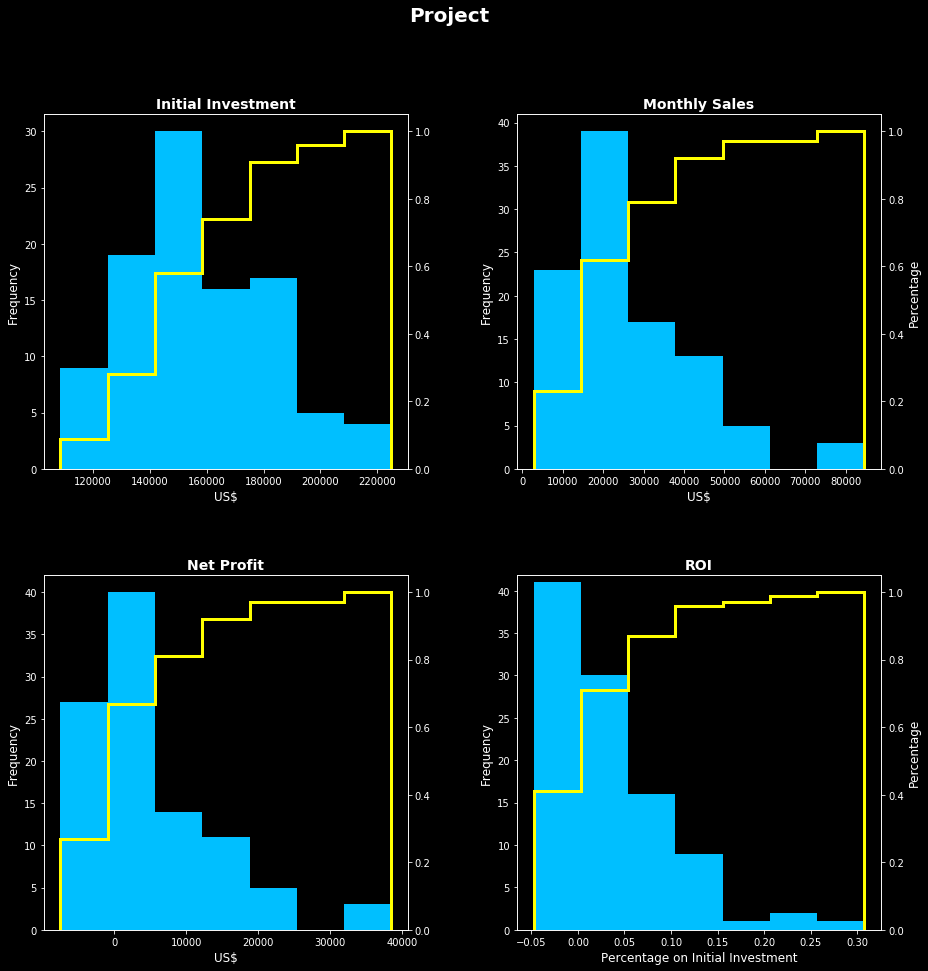

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.grid(which='major', axis='y')
plt.style.use("dark_background")
plt.margins(0.02)

df['initial investment'].plot(ax=axes[0, 0], color = '#00bfff', kind = "hist", bins = 7)
df['monthly sales'].plot(ax=axes[0, 1], color = '#00bfff', kind = "hist", bins = 7)
df['Net Profit'].plot(ax=axes[1, 0], color = '#00bfff', kind = "hist", bins = 7)
df['ROI'].plot(ax=axes[1, 1], color = '#00bfff', kind = "hist", bins = 7)

axes[0, 0].xaxis.set_label_text("US$", fontsize=12)
axes[0, 1].xaxis.set_label_text("US$", fontsize=12)
axes[1, 0].xaxis.set_label_text("US$", fontsize=12)
axes[1, 1].xaxis.set_label_text("Percentage on Initial Investment", fontsize=12)

axes[0, 0].set_ylabel('Frequency', fontsize = 12)
axes[0, 1].set_ylabel('Frequency', fontsize = 12)
axes[1, 0].set_ylabel('Frequency', fontsize = 12)
axes[1, 1].set_ylabel('Frequency', fontsize = 12)

axes[0, 0].set_title("Initial Investment", fontsize=14, fontweight='bold')
axes[0, 1].set_title("Monthly Sales", fontsize=14, fontweight='bold')
axes[1, 0].set_title("Net Profit", fontsize=14, fontweight='bold')
axes[1, 1].set_title("ROI", fontsize=14, fontweight='bold')

fig.suptitle('Project', weight='black', fontsize=20)

ax1 = axes[0, 0].twinx()
ax2 = axes[0, 1].twinx()
ax3 = axes[1, 0].twinx()
ax4 = axes[1, 1].twinx()

ax2.set_ylabel("Percentage", fontsize = 12)
ax4.set_ylabel("Percentage", fontsize = 12)
            
ax1.hist(df['initial investment'], 7, density=True, histtype='step', color='yellow', cumulative=True, linewidth=3 )
ax2.hist(df['monthly sales'], 7, density=True, histtype='step', color='yellow', cumulative=True, linewidth=3)
ax3.hist(df['Net Profit'], 7, density=True, histtype='step', color='yellow', cumulative=True, linewidth=3)
ax4.hist(df['ROI'], 7, density=True, histtype='step', color='yellow', cumulative=True, linewidth=3)

plt.show()
